In [1]:
import gymnasium as gym
import numpy as np
from itertools import count
import matplotlib.pyplot as plt
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.multiprocessing as mp
from tqdm import tqdm
import os
os.chdir('..')

# Multi Agent DDPG (MADDPG)

# Demos

## Speaker Listener

In [2]:
import pickle
from scripts.maddpg import FCDP, FCTQV
res = {}
with open('testfiles/maddpg_speakerlistener.results', 'rb') as file:
    res = pickle.load(file)

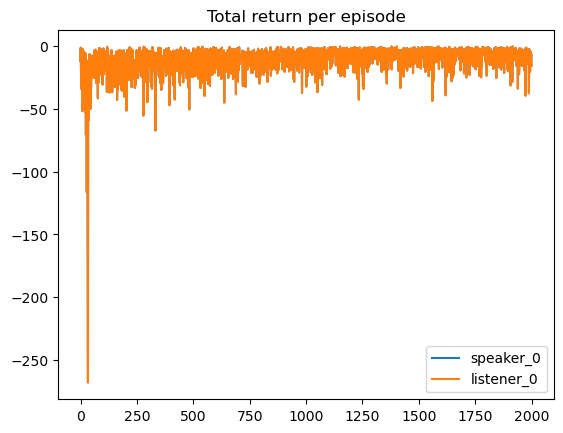

In [3]:
episode_returns = res['episode_returns']
for agent, returns in episode_returns.items():
    plt.plot(range(len(returns)), returns, label=f'{agent}')
plt.title('Total return per episode')
#plt.ylim(bottom=-50, top=0)
plt.legend()

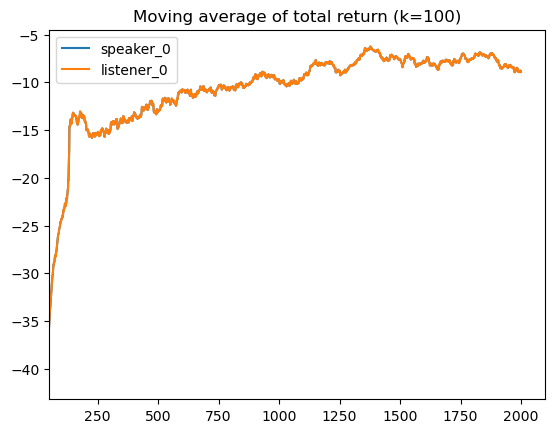

In [6]:
episode_returns = res['episode_returns']
for agent, returns in episode_returns.items():
    plt.plot(range(len(returns)), [np.mean(returns[max(0,x-100):x+1]) for x in range(len(returns))], label=f'{agent}')
plt.title('Moving average of total return (k=100)')
#plt.ylim(bottom=-50, top=0)
plt.xlim(left=50)
plt.legend()

In [7]:
from pettingzoo.mpe import simple_speaker_listener_v4
#from pettingzoo.mpe import simple_reference_v3
env = simple_speaker_listener_v4.env(max_cycles=25, continuous_actions=True, render_mode="human")
for _ in range(10):
    env.reset()
    ep_return = {agent : 0 for agent in env.possible_agents}
    for agent in env.agent_iter():
        observation, reward, termination, truncation, info = env.last()
        ep_return[agent] += reward
        if termination or truncation:
            action = None
        else:
            # this is where you would insert your policy
            #action = env.action_space(agent).sample()
            action = res['best_model'][agent].select_action(observation)
        env.step(action)
    print(ep_return)
env.close()

{'speaker_0': -25.979047575785977, 'listener_0': -25.979047575785977}
{'speaker_0': -6.126248579174038, 'listener_0': -6.126248579174038}
{'speaker_0': -23.05633952297658, 'listener_0': -23.05633952297658}
{'speaker_0': -2.6002362606705742, 'listener_0': -2.6002362606705742}
{'speaker_0': -4.679797005338816, 'listener_0': -4.679797005338816}
{'speaker_0': -0.47070939170852294, 'listener_0': -0.47070939170852294}
{'speaker_0': -7.298809408847522, 'listener_0': -7.298809408847522}
{'speaker_0': -4.182602753130762, 'listener_0': -4.182602753130762}
{'speaker_0': -20.389631545795698, 'listener_0': -20.389631545795698}
{'speaker_0': -1.061177841551397, 'listener_0': -1.061177841551397}


## Reference

In [16]:
import pickle
from scripts.maddpg import FCDP, FCTQV
res = {}
with open('testfiles/maddpg_reference.results', 'rb') as file:
    res = pickle.load(file)

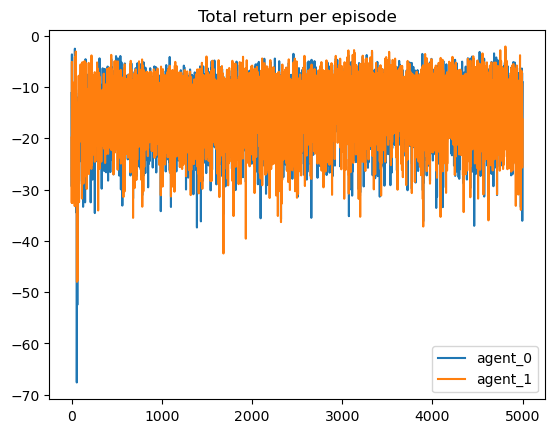

In [17]:
episode_returns = res['episode_returns']
for agent, returns in episode_returns.items():
    plt.plot(range(len(returns)), returns, label=f'{agent}')
plt.title('Total return per episode')
#plt.ylim(bottom=-50, top=0)
plt.legend()

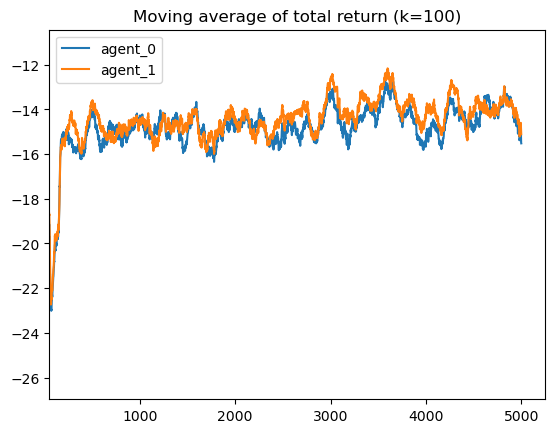

In [18]:
episode_returns = res['episode_returns']
for agent, returns in episode_returns.items():
    plt.plot(range(len(returns)), [np.mean(returns[max(0,x-100):x+1]) for x in range(len(returns))], label=f'{agent}')
plt.title('Moving average of total return (k=100)')
#plt.ylim(bottom=-50, top=0)
plt.xlim(left=50)
plt.legend()

In [19]:
from pettingzoo.mpe import simple_reference_v3
env = simple_reference_v3.env(max_cycles=25, continuous_actions=True, render_mode="human")
for _ in range(10):
    env.reset()
    ep_return = {agent : 0 for agent in env.possible_agents}
    for agent in env.agent_iter():
        observation, reward, termination, truncation, info = env.last()
        ep_return[agent] += reward
        if termination or truncation:
            action = None
        else:
            # this is where you would insert your policy
            #action = env.action_space(agent).sample()
            action = res['best_model'][agent].select_action(observation)
        env.step(action)
    print(ep_return)
env.close()

{'agent_0': -23.656796082838667, 'agent_1': -11.483989363580722}
{'agent_0': -11.998083278423534, 'agent_1': -13.832743808116206}
{'agent_0': -24.331107875410595, 'agent_1': -30.496175543315463}
{'agent_0': -18.02000060705057, 'agent_1': -20.22684708270637}
{'agent_0': -18.61795332288503, 'agent_1': -20.777550729369143}
{'agent_0': -14.601411129336814, 'agent_1': -22.07212286973904}
{'agent_0': -24.045970087642022, 'agent_1': -16.71915541925285}
{'agent_0': -17.075316438505798, 'agent_1': -26.53917779781822}
{'agent_0': -39.42763051067295, 'agent_1': -34.448746483906746}
{'agent_0': -23.472498055573638, 'agent_1': -27.641290821087605}


## Spread

In [8]:
import pickle
from scripts.maddpg import FCDP, FCTQV
res = {}
with open('testfiles/maddpg_spread.results', 'rb') as file:
    res = pickle.load(file)

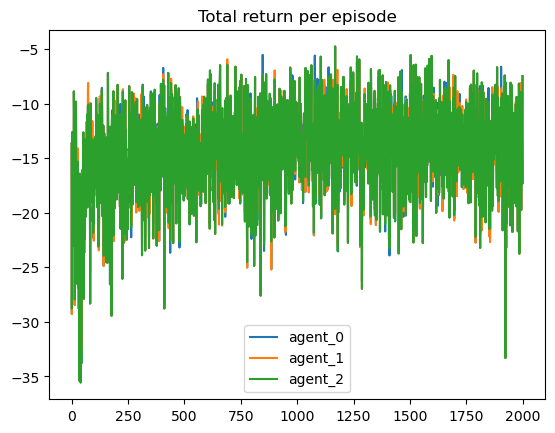

In [9]:
episode_returns = res['episode_returns']
for agent, returns in episode_returns.items():
    plt.plot(range(len(returns)), returns, label=f'{agent}')
plt.title('Total return per episode')
#plt.ylim(bottom=-50, top=0)
plt.legend()

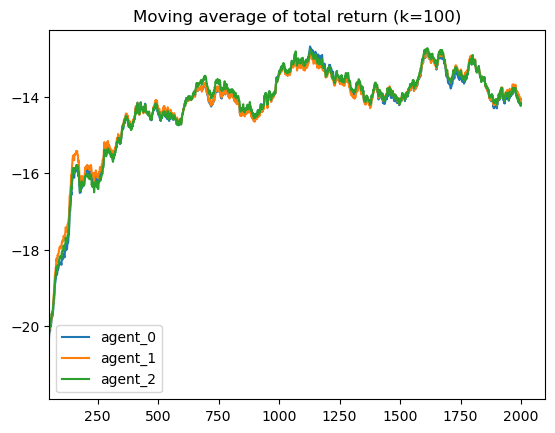

In [10]:
episode_returns = res['episode_returns']
for agent, returns in episode_returns.items():
    plt.plot(range(len(returns)), [np.mean(returns[max(0,x-100):x+1]) for x in range(len(returns))], label=f'{agent}')
plt.title('Moving average of total return (k=100)')
#plt.ylim(bottom=-50, top=0)
plt.xlim(left=50)
plt.legend()

In [11]:
from pettingzoo.mpe import simple_spread_v3
env = simple_spread_v3.env(max_cycles=25, continuous_actions=True, render_mode="human")
for _ in range(10):
    env.reset()
    ep_return = {agent : 0 for agent in env.possible_agents}
    for agent in env.agent_iter():
        observation, reward, termination, truncation, info = env.last()
        ep_return[agent] += reward
        if termination or truncation:
            action = None
        else:
            # this is where you would insert your policy
            #action = env.action_space(agent).sample()
            action = res['best_model'][agent].select_action(observation)
        env.step(action)
    print(ep_return)
env.close()

{'agent_0': -17.806865054034784, 'agent_1': -17.806865054034784, 'agent_2': -17.806865054034784}
{'agent_0': -14.290828649237467, 'agent_1': -14.290828649237467, 'agent_2': -14.290828649237467}
{'agent_0': -10.973423444540582, 'agent_1': -10.973423444540582, 'agent_2': -10.973423444540582}
{'agent_0': -18.72494630506242, 'agent_1': -19.22494630506242, 'agent_2': -19.22494630506242}
{'agent_0': -10.717402134332325, 'agent_1': -10.717402134332325, 'agent_2': -10.717402134332325}
{'agent_0': -19.75417769148955, 'agent_1': -19.75417769148955, 'agent_2': -19.75417769148955}
{'agent_0': -15.027102984183138, 'agent_1': -15.027102984183138, 'agent_2': -14.527102984183138}
{'agent_0': -14.82217809598912, 'agent_1': -14.82217809598912, 'agent_2': -13.32217809598912}
{'agent_0': -15.70139507310832, 'agent_1': -15.20139507310832, 'agent_2': -14.70139507310832}
{'agent_0': -14.453156085367308, 'agent_1': -14.453156085367308, 'agent_2': -14.453156085367308}
